# Stock Conditional Value-At-Risk Chart

In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics

import warnings
warnings.filterwarnings("ignore")

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [2]:
start = '2020-01-01' #input
end = '2023-01-01' #input
symbol = 'TCS.NS' #input

In [3]:
stocks = yf.download(symbol, start=start, end=end)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [4]:
stocks_returns = stocks.pct_change().dropna()

In [5]:
def cvar(stock_returns):
    confidence_level = 0.05
    sortedReturns = sorted(stock_returns)
    CVaR = (1 - statistics.mean(sortedReturns[0:int(len(sortedReturns)*confidence_level)])) * math.sqrt(252/12)
    return CVaR

Text(0, 0.5, 'Conditional Value-at-Risk')

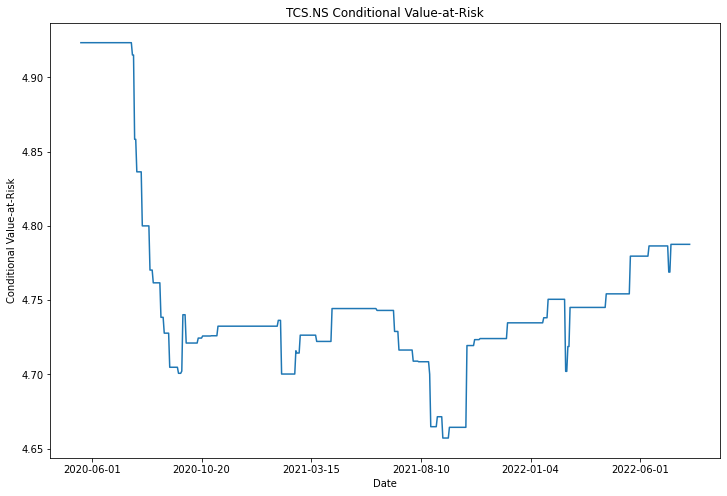

In [6]:
# Compute the running Conditional Value-at-Risk
running = [cvar(stocks_returns[i-90:i]) for i in range(90, len(stocks_returns))]

# Plot running Conditional Value-at-Risk up to 100 days before the end of the data set
_, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(range(90, len(stocks_returns)-100), running[:-100])
ticks = ax1.get_xticks()
ax1.set_xticklabels([stocks.index[int(i)].date() for i in ticks[:-1]]) # Label x-axis with dates
plt.title(symbol + ' Conditional Value-at-Risk')
plt.xlabel('Date')
plt.ylabel('Conditional Value-at-Risk')

In [7]:
stock_cvar = cvar(stocks_returns)
stock_cvar

4.770717985657502

In [8]:
running = [cvar(stocks_returns[i-90:i]) for i in range(90, len(stocks_returns))]
running

[4.923432624086897,
 4.923432624086897,
 4.923432624086897,
 4.923432624086897,
 4.923432624086897,
 4.923432624086897,
 4.923432624086897,
 4.923432624086897,
 4.923432624086897,
 4.923432624086897,
 4.923432624086897,
 4.923432624086897,
 4.923432624086897,
 4.923432624086897,
 4.923432624086897,
 4.923432624086897,
 4.923432624086897,
 4.923432624086897,
 4.923432624086897,
 4.923432624086897,
 4.923432624086897,
 4.923432624086897,
 4.923432624086897,
 4.923432624086897,
 4.923432624086897,
 4.923432624086897,
 4.923432624086897,
 4.923432624086897,
 4.923432624086897,
 4.923432624086897,
 4.923432624086897,
 4.923432624086897,
 4.923432624086897,
 4.923432624086897,
 4.923432624086897,
 4.923432624086897,
 4.923432624086897,
 4.923432624086897,
 4.923432624086897,
 4.923432624086897,
 4.923432624086897,
 4.923432624086897,
 4.923432624086897,
 4.923432624086897,
 4.923432624086897,
 4.923432624086897,
 4.923432624086897,
 4.91513485825656,
 4.91513485825656,
 4.858351060330878,
 4